In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
titanic=pd.read_csv('tested.csv', index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [6]:
titanic[titanic.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


In [9]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [10]:
titanic[titanic.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [11]:
titanic.Fare.dropna(axis=0, inplace=True)

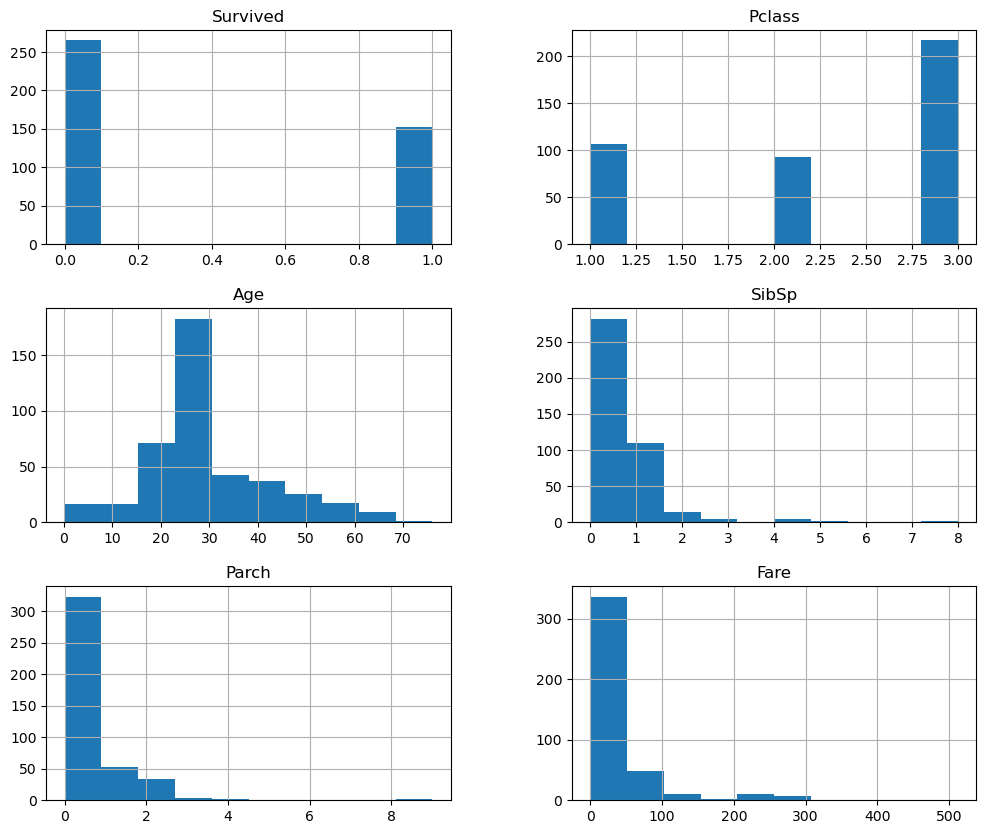

In [17]:
titanic.hist(figsize=(12,10));

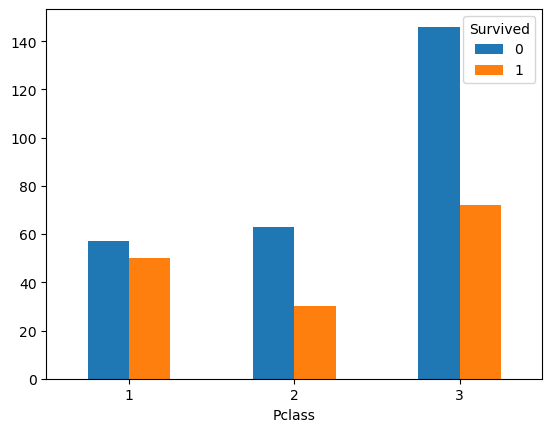

In [18]:
titanic.groupby(['Pclass', 'Survived'])['Sex'].count().unstack().plot.bar(rot=0);

In [19]:
titanic['Age_bins']=pd.cut(titanic.Age, bins=[0,13,19,35,60,np.inf], labels=['Children', 'Teens', 'Young Adults', 'Adults', 'Old'])

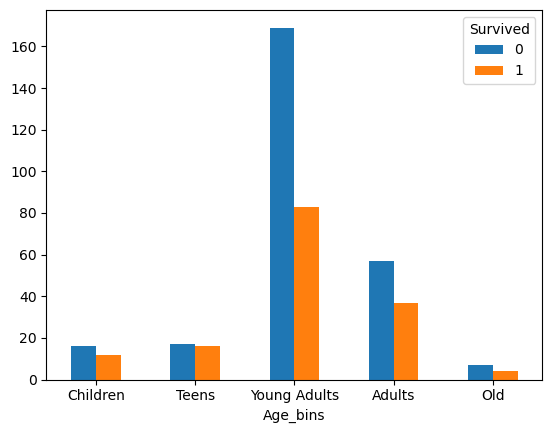

In [20]:
titanic.groupby(['Age_bins', 'Survived'])['Sex'].count().unstack().plot.bar(rot=0);

In [22]:
titanic.loc[(titanic.SibSp ==0), 'Sib']= 'no_sib'
titanic.loc[(titanic.SibSp >0), 'Sib']= 'sib'
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bins,Sib
PassengerId,,,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adults,no_sib
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adults,sib
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Old,no_sib
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adults,no_sib
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adults,sib


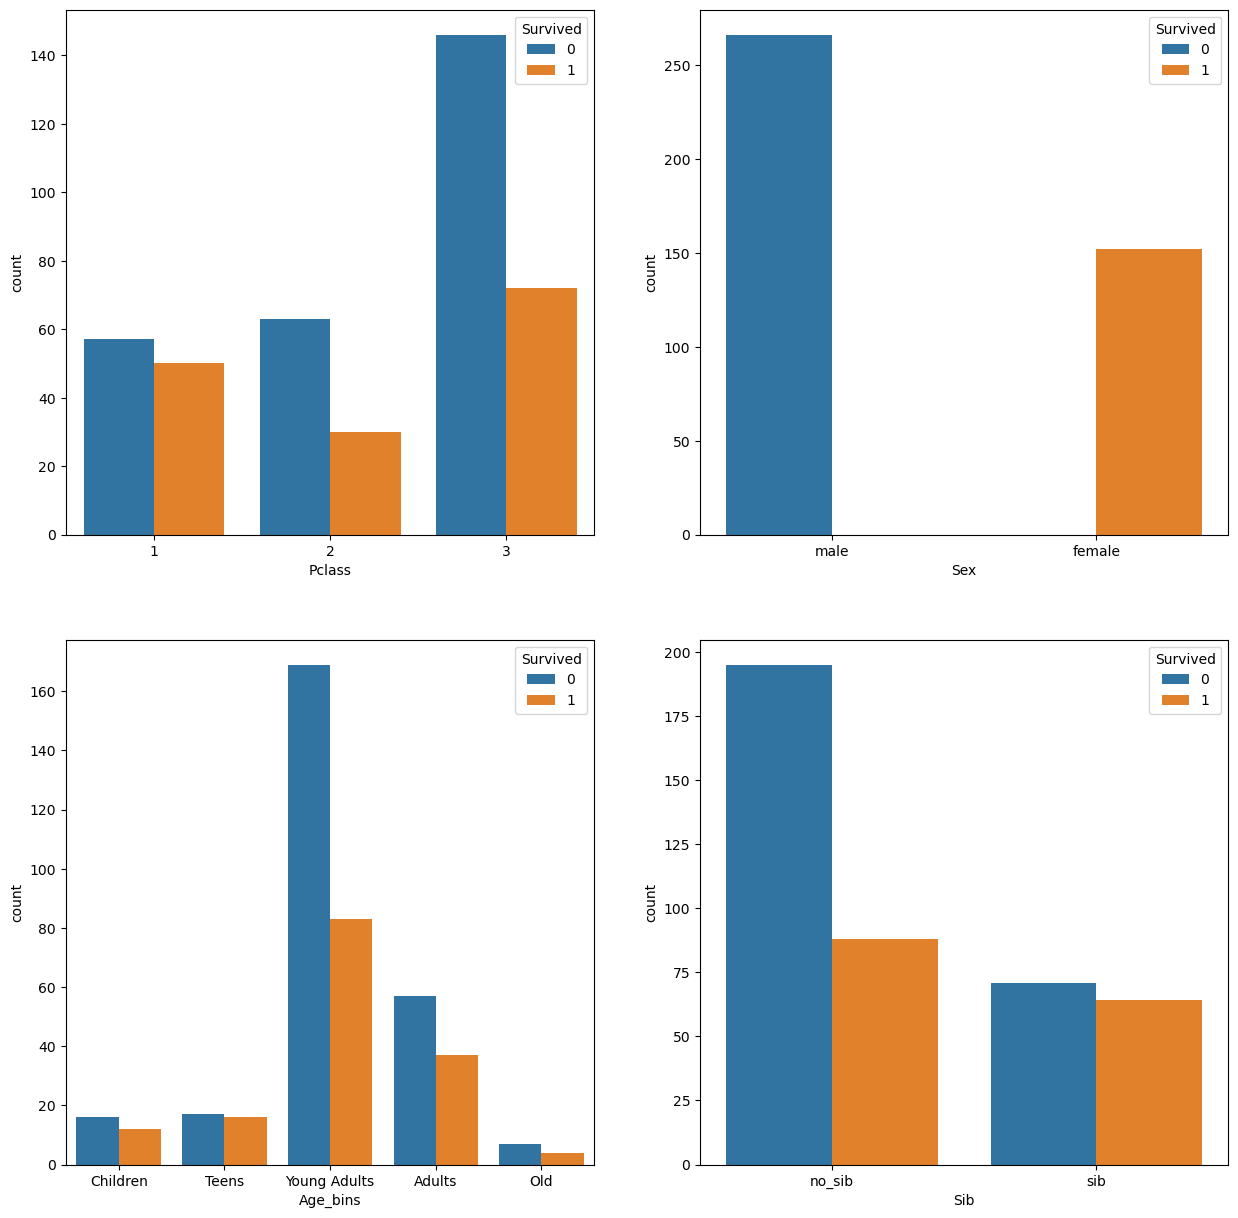

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i, ax in zip(titanic.columns[[1,3,11,12]].tolist(),axes.flat):
    sns.countplot(x=i, hue='Survived',ax=ax, data=titanic)